# Part II - Factors Contributing to Borrowers APR and amount borrowed

## by Johnny Samuel

## Investigation Overview


> Prosper Loan is an organisation that seeks to provide loan for it's customers are a certain rate. We hope to use the data of each borrower to understand the factors that may have contributed to the present status of each borrower. This is aimed at analysing the factors that could affect the borrowers APR and the original amount that was given to the borrower.




## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

It is worthy of note that we have time as a limitation which will not permit us to analyse all the the columns listed. Our focus will be on the borrowers APR and  Borrowers status

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv',encoding='ISO-8859-1')
# Subset the dataframe by selecting features of interest
loan_col=['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','Occupation','BorrowerRate','LoanStatus']
loan = df[loan_col]
# data wrangling, remove loans with missing borrower APR information
loan_new = loan.dropna(subset=['BorrowerAPR'])
# Catogorising of ProsperRating and Employment status
rate_order = ['AA','A','B','C','D','E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_new['ProsperRating (Alpha)'] = loan_new['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_new['EmploymentStatus'] = loan_new['EmploymentStatus'].astype(ordered_var)
loan_new.shape

(113912, 9)

In [3]:
# categorise the stated monthly income to better understand the data 
def classify(row):
    if row["StatedMonthlyIncome"]<1000:
        return 'Low'
    elif row["StatedMonthlyIncome"]<4000:
        return 'Lower-Middle'
    elif row["StatedMonthlyIncome"]<12000:
        return 'Upper-Middle'
    else:
        return 'High'
    
loan_new['WageGroup'] = loan_new.apply(classify, axis=1)

wage_order = ['Low', 'Lower-Middle','Upper-Middle', 'High']
wage_cat = pd.api.types.CategoricalDtype(ordered = True, categories = wage_order)
loan_new['WageGroup'] = loan_new['WageGroup'].astype(wage_cat);

## What can be said about the borrowers APR based on the statistics of borrowers?


We observe that the histogram is skewed to the right with an outlier at 0.35 which may be error


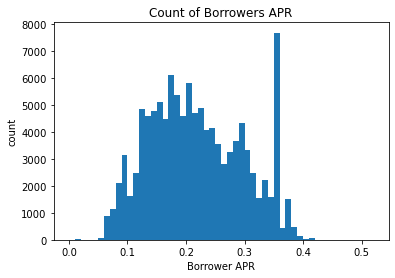

In [4]:
bins = np.arange(0, loan['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = loan, x = 'BorrowerAPR', bins=bins);
plt.title('Count of Borrowers APR')
plt.xlabel('Borrower APR')
plt.ylabel('count');

## whats the effect of loan status on borrower APR?


> It is observed that it is negatively correlated that is a decrease in the loan amount leads to an increase in the BorrowerAPR

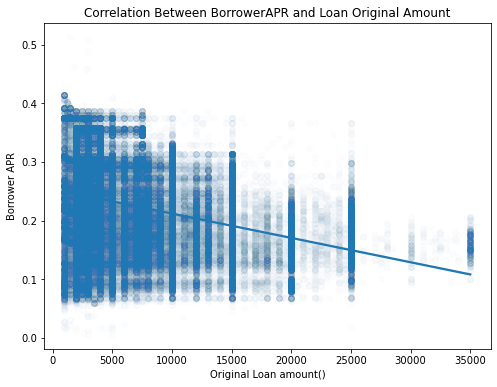

In [5]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan_new, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('Correlation Between BorrowerAPR and Loan Original Amount')
plt.xlabel('Original Loan amount()')
plt.ylabel('Borrower APR');

### what is the Relationship of Borrower Rate with Employment Status, Prosper Rating and Wage Group?

* Those having some source of employment seems to have the same range in Borrowers Rate whille those without employment have a higher rate
* Prosper Rating has as the Prosper rating increase there is a corresonding reduction in the Borrower rate
* A decrease in the Wage group income leads to a corresponding decrease in the Borrower rate

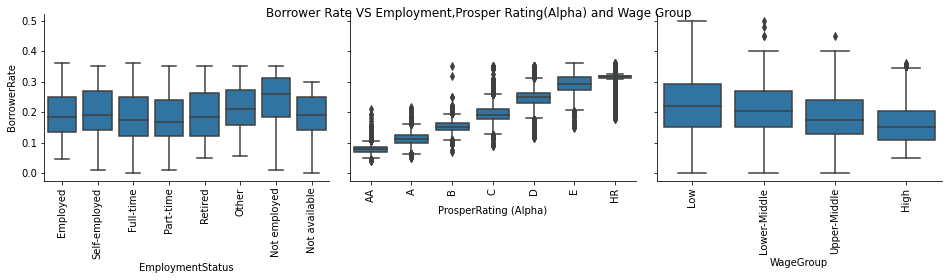

In [6]:
# We use  sample of 2000 which  makes the analysis faster
df_samp = loan.sample(2000, replace=False)

#defining boxgrid function
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);


g = sns.PairGrid(data = loan_new, y_vars = ['BorrowerRate'], x_vars = ['EmploymentStatus','ProsperRating (Alpha)','WageGroup'],
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.suptitle('Borrower Rate VS Employment,Prosper Rating(Alpha) and Wage Group');


### What is the Relationship Between  Wage Group, Original Loan Amount and Term?


> Its observed that those with higher term also borrow higher amount and also the higher the borrowers income the higher the term and the higher the amount borrowed, this should be because of the collateral they have.

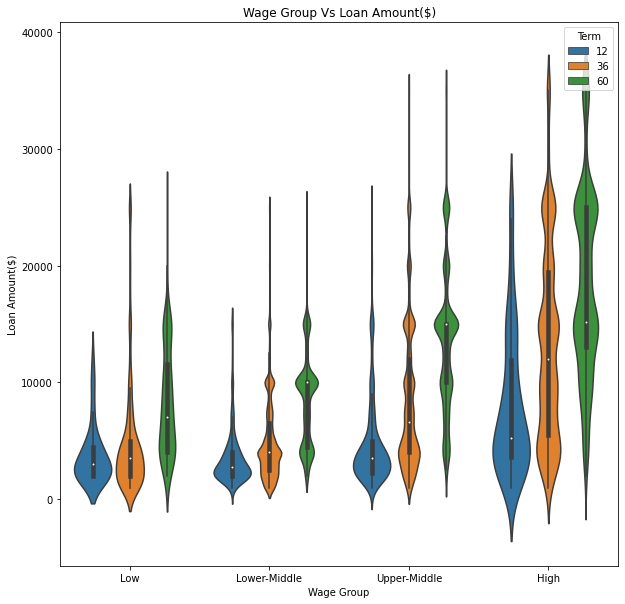

In [7]:
# we plot a line graph of wage group and loan amount against the Term
plt.figure(figsize=(10,10))
g=sns.violinplot(data=loan_new, x='WageGroup', y='LoanOriginalAmount', hue='Term',ci=None);
plt.title('Wage Group Vs Loan Amount($)')
plt.xlabel('Wage Group')
plt.ylabel('Loan Amount($)');